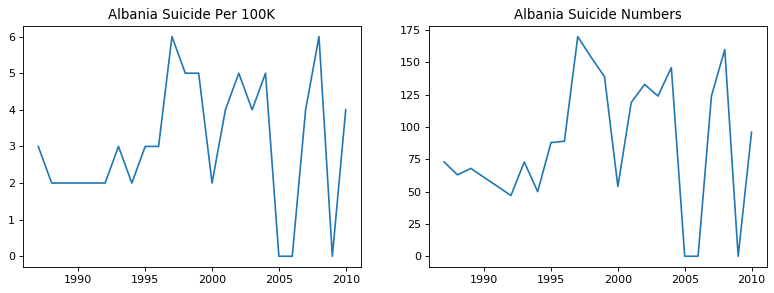

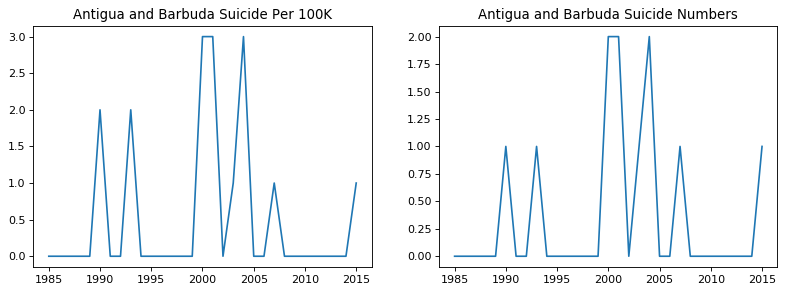

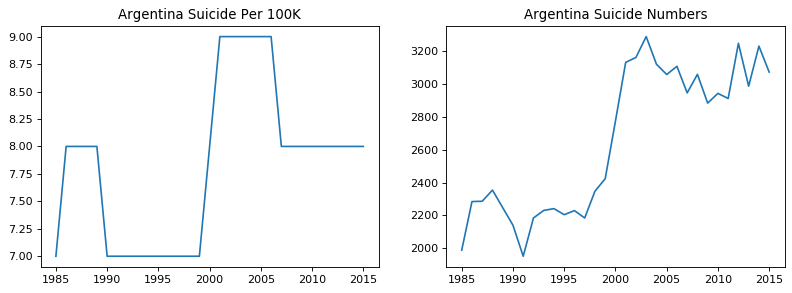

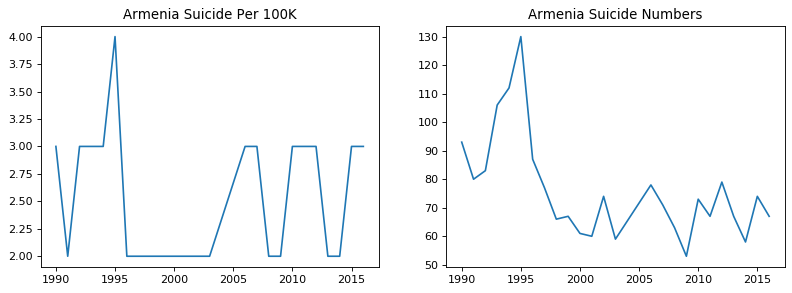

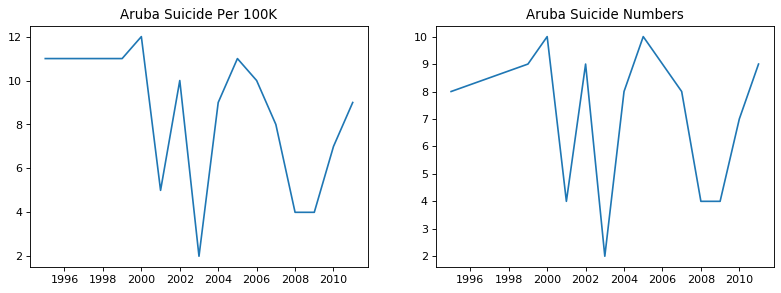

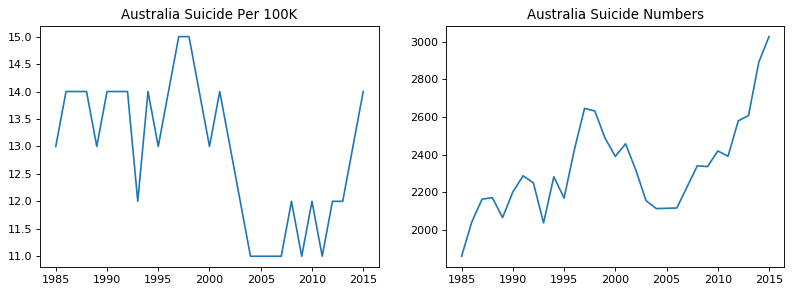

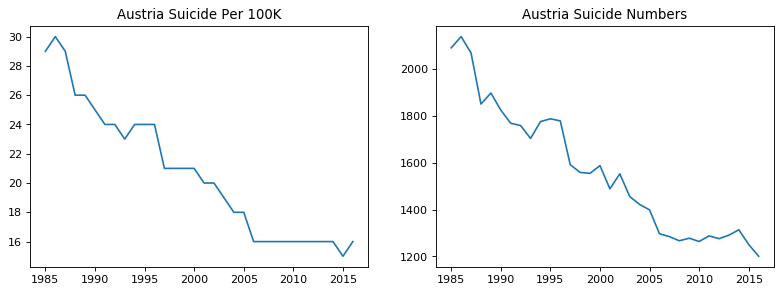

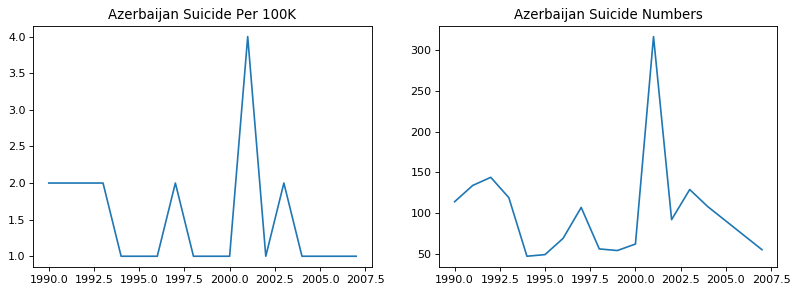

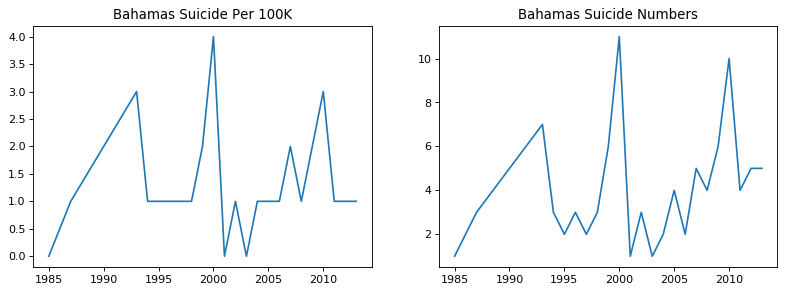

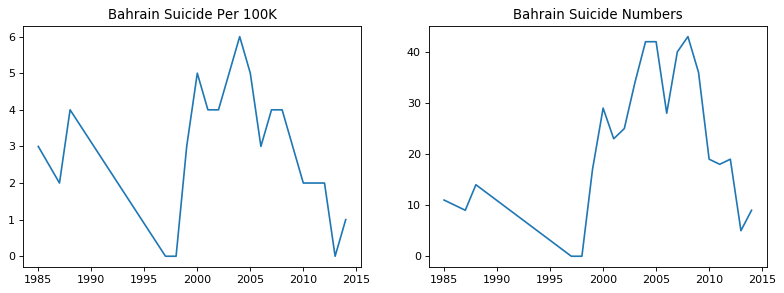

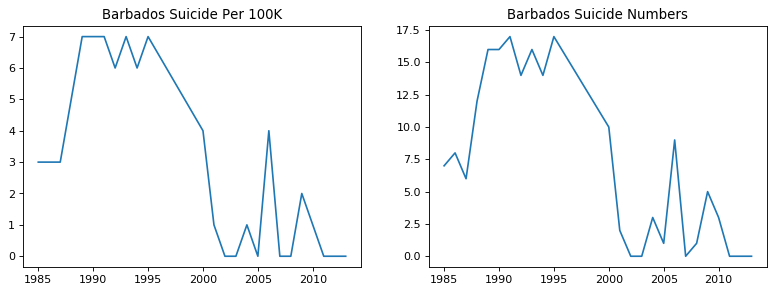

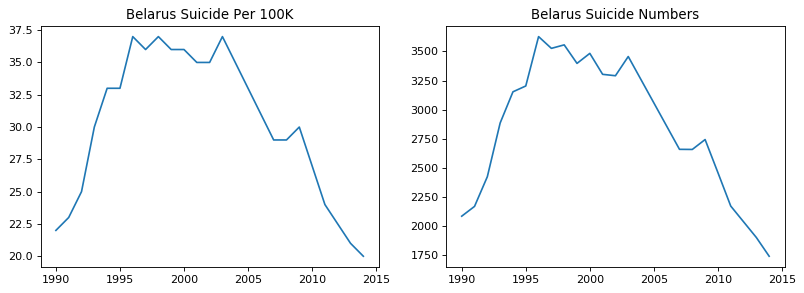

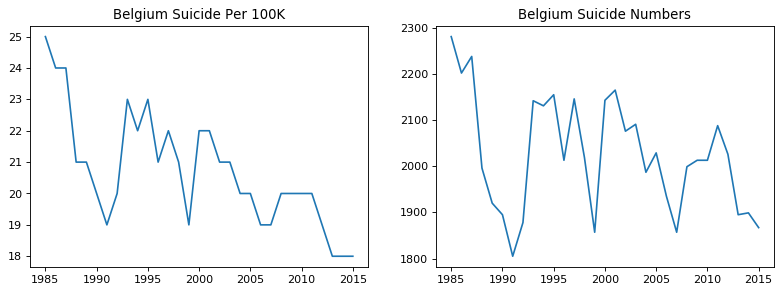

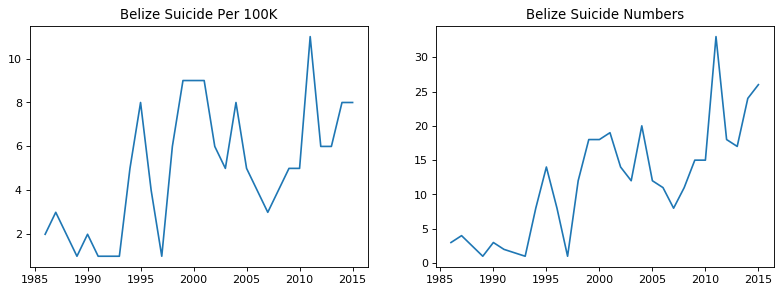

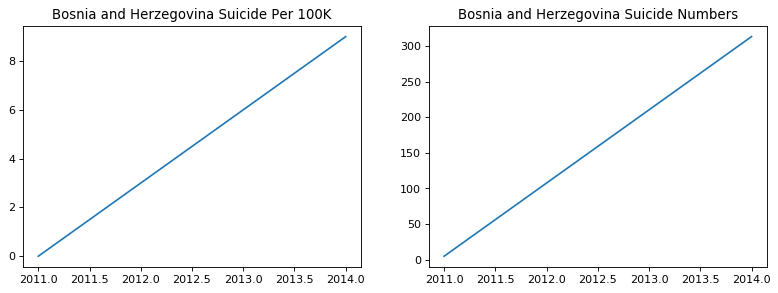

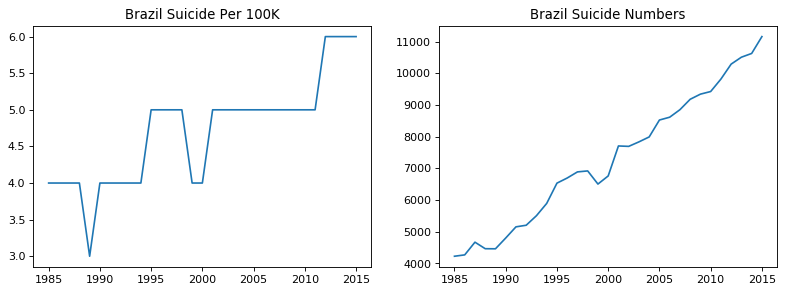

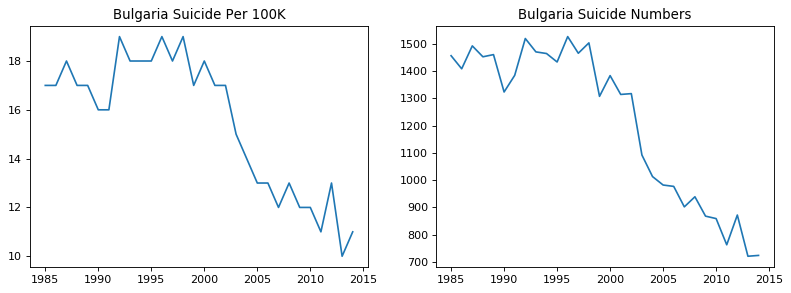

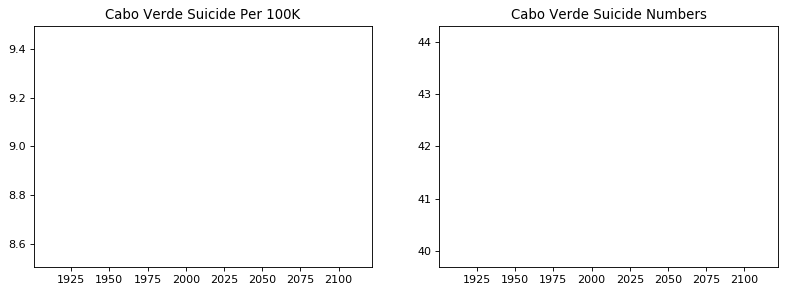

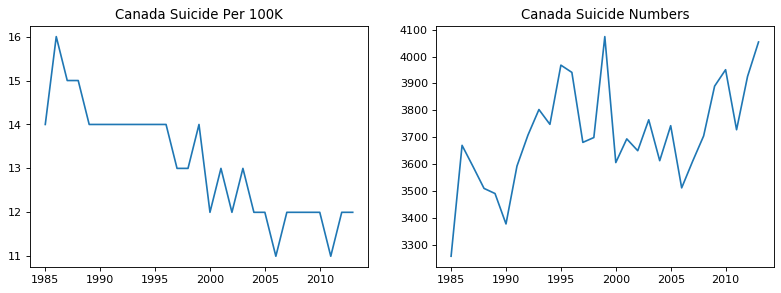

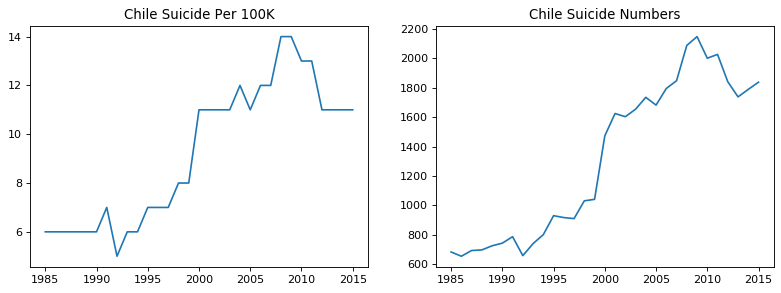

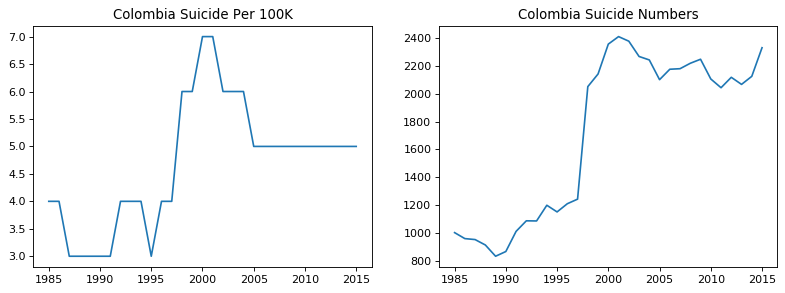

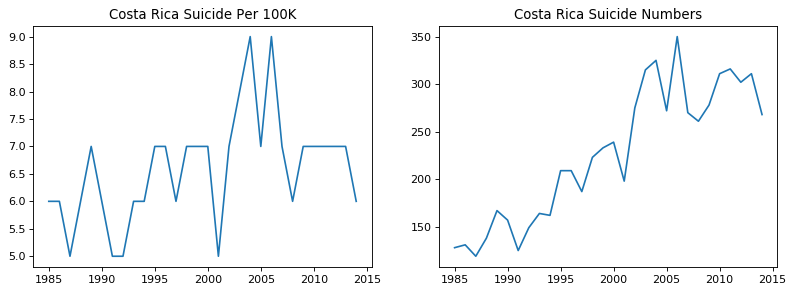

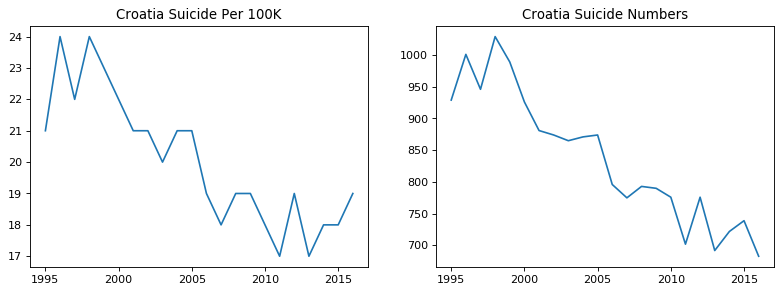

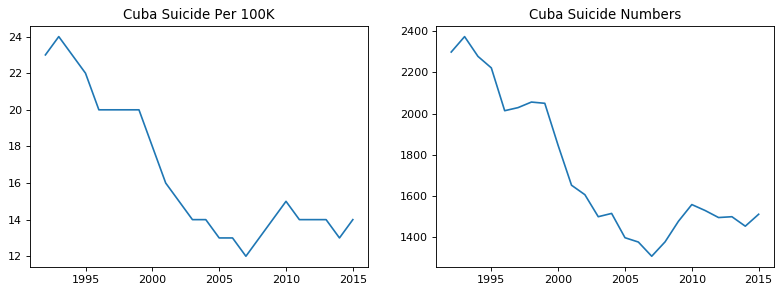

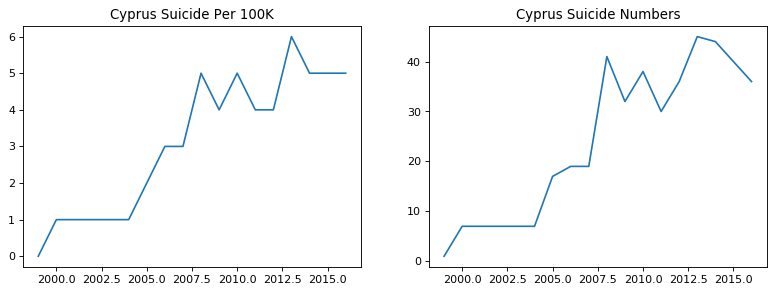

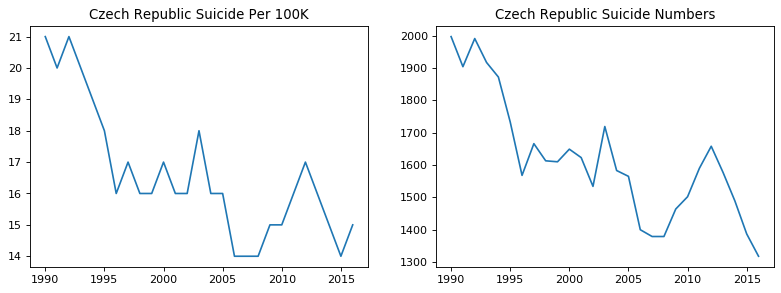

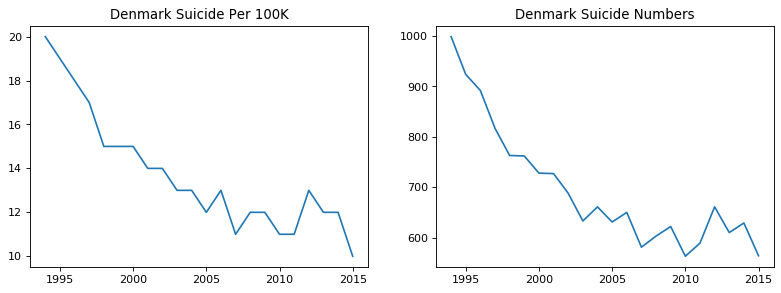

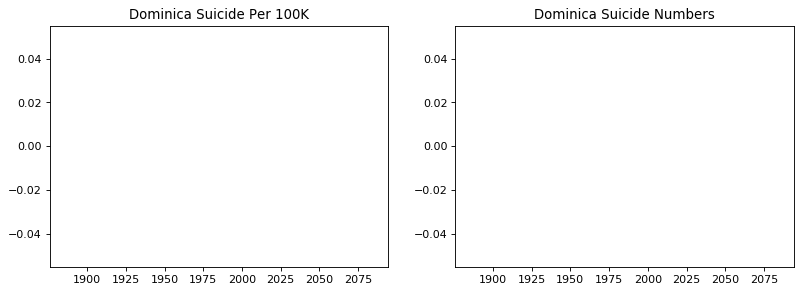

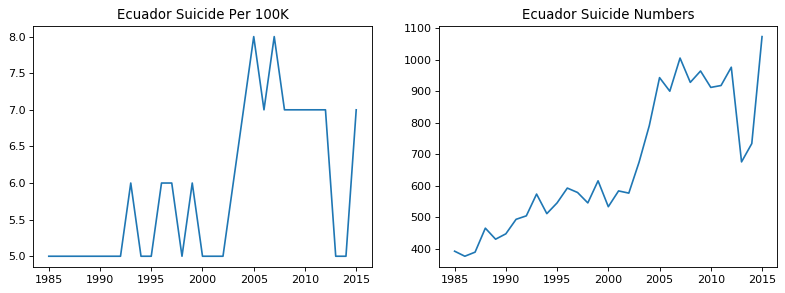

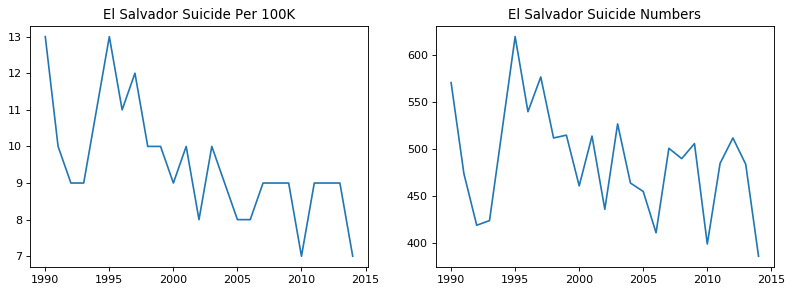

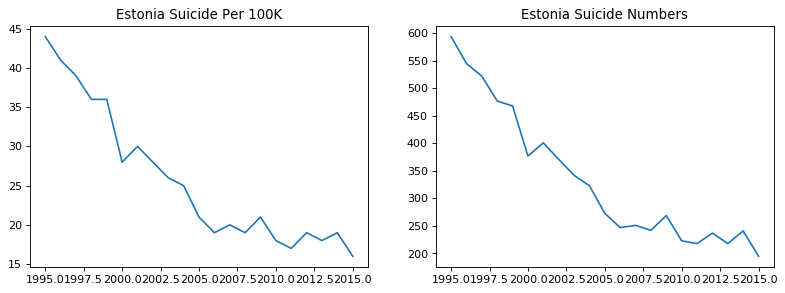

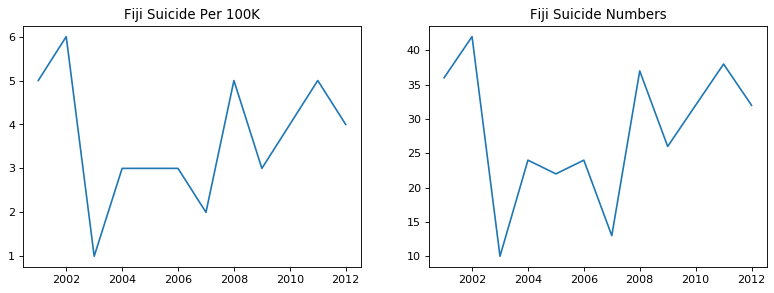

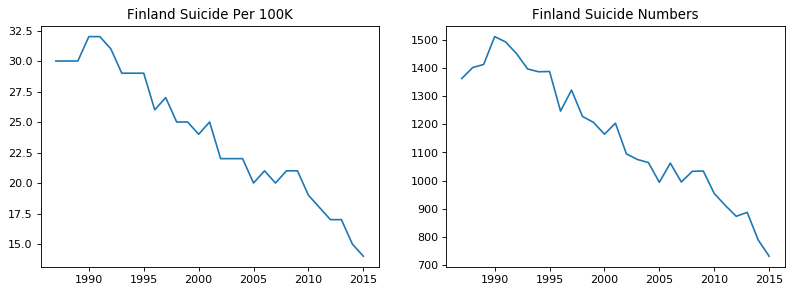

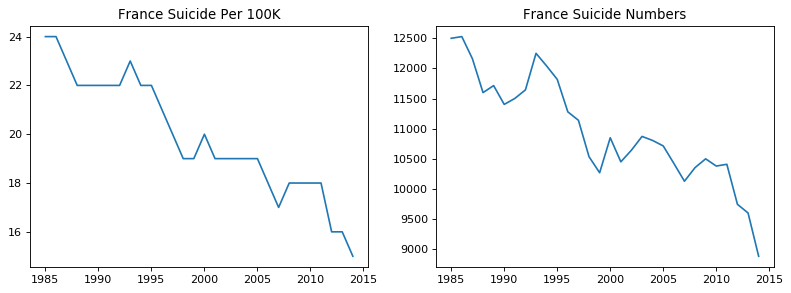

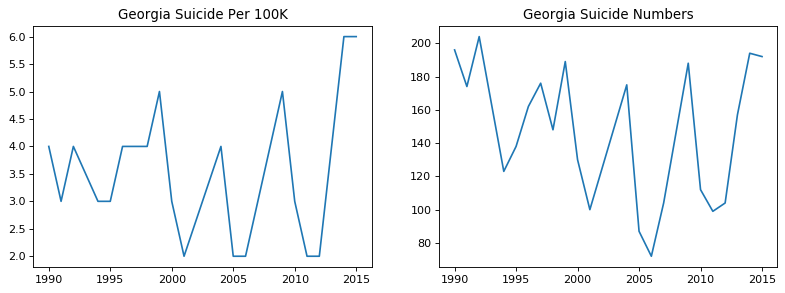

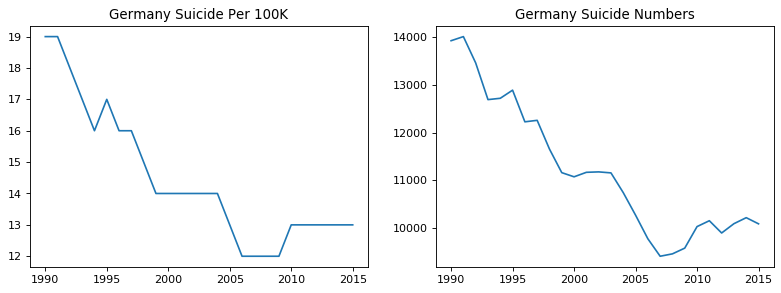

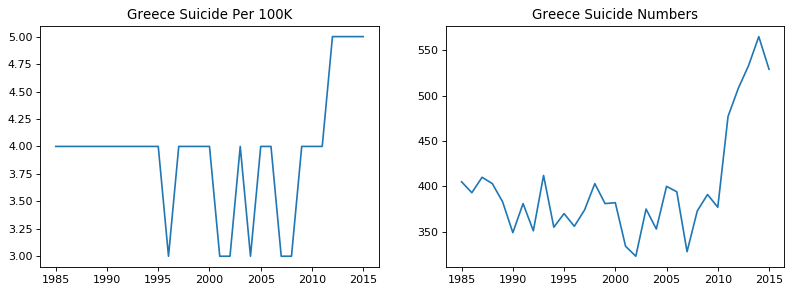

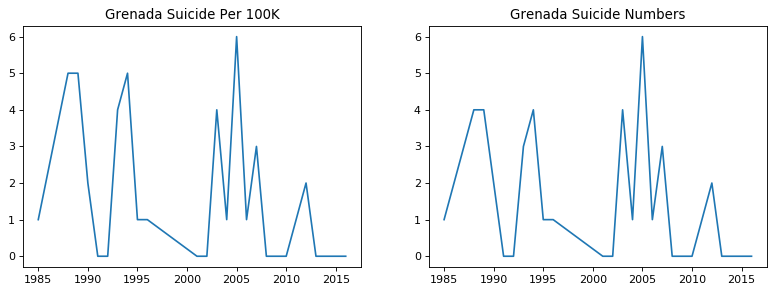

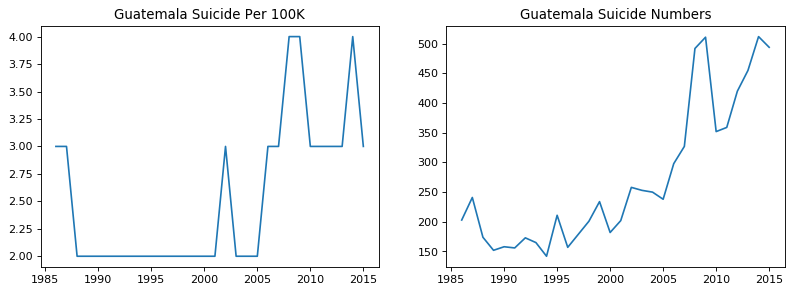

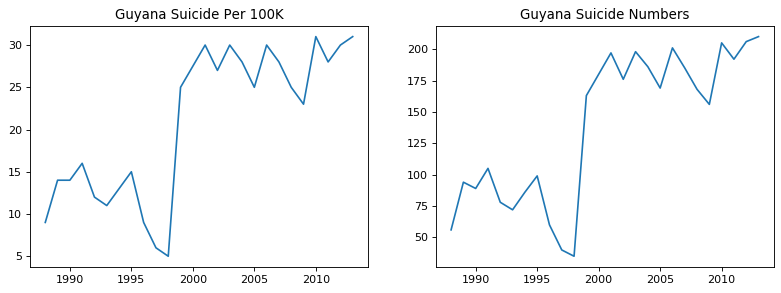

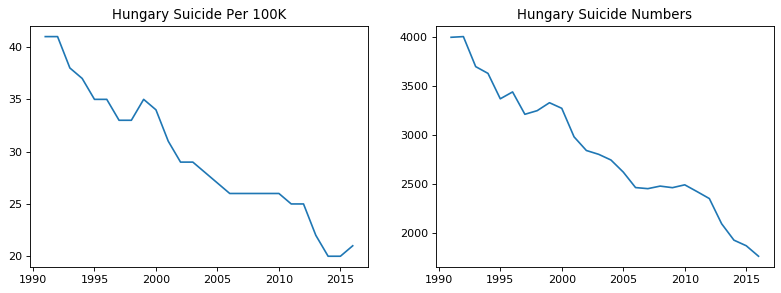

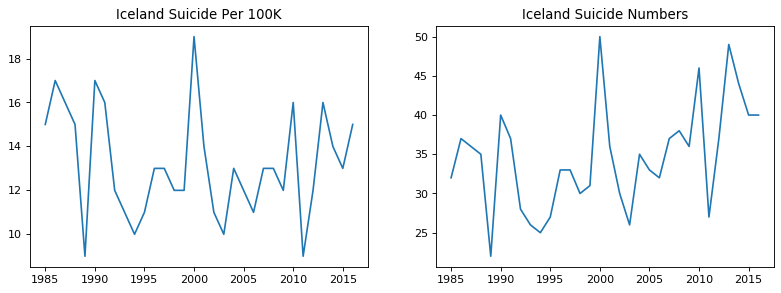

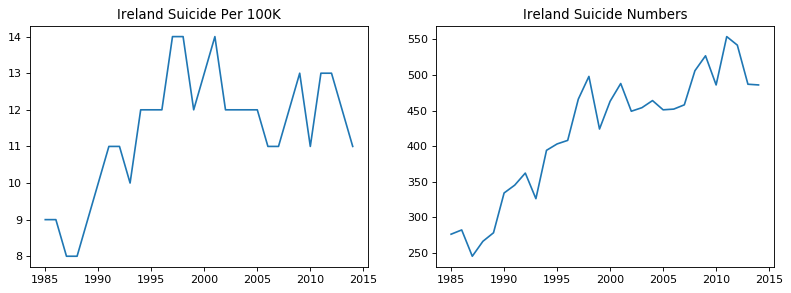

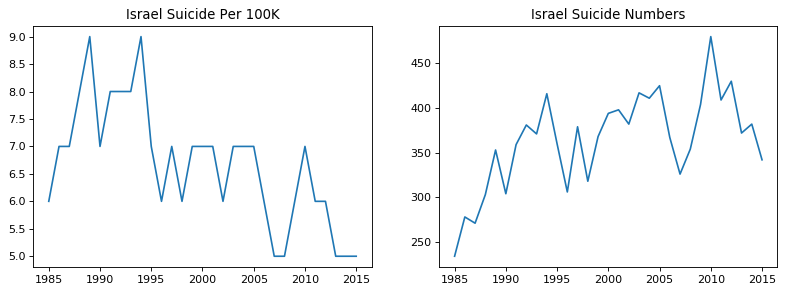

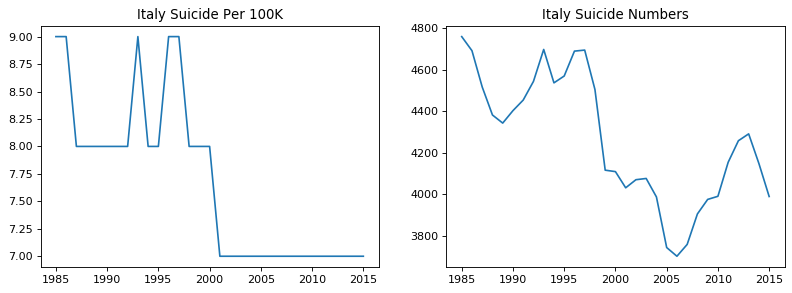

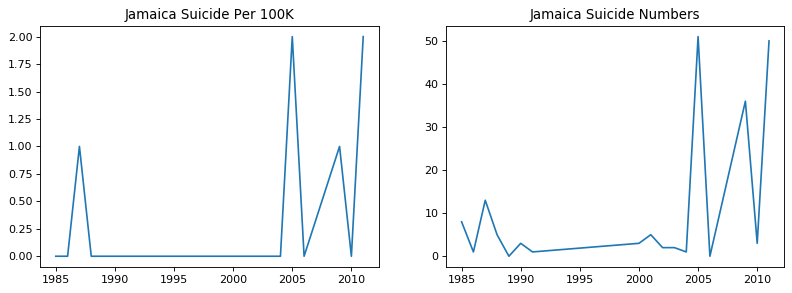

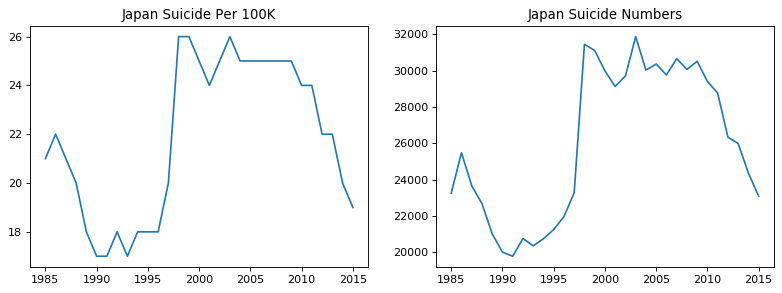

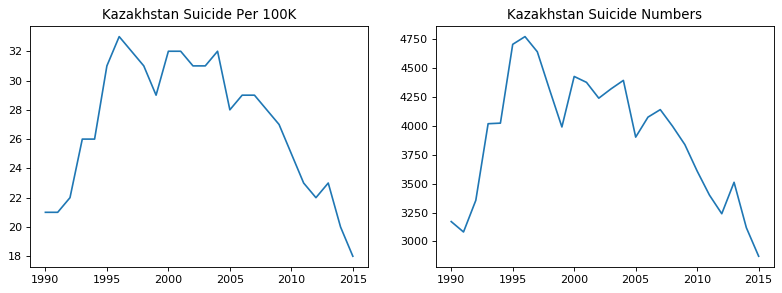

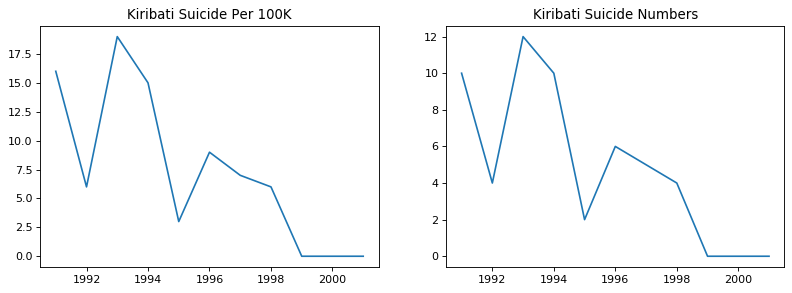

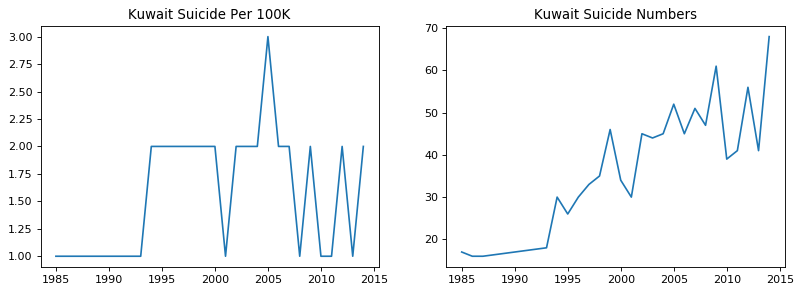

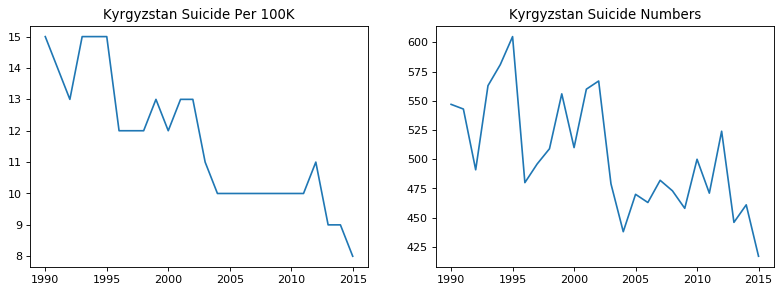

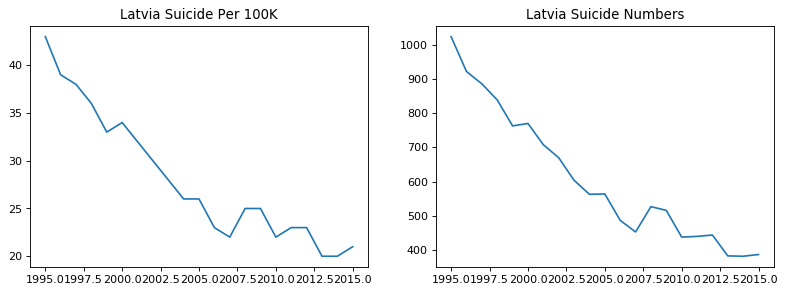

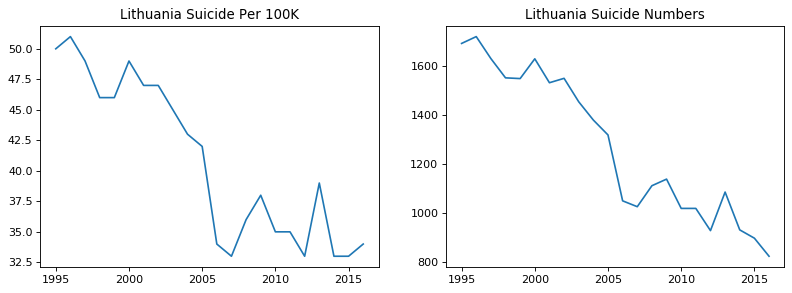

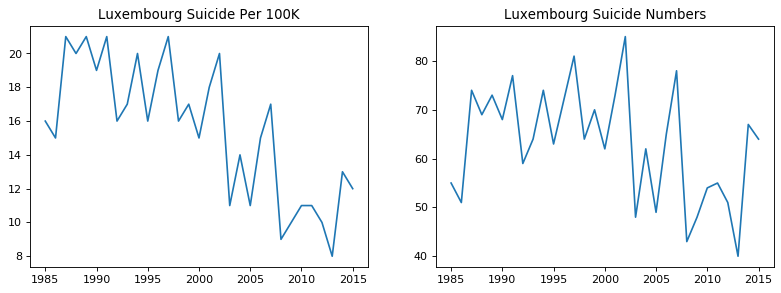

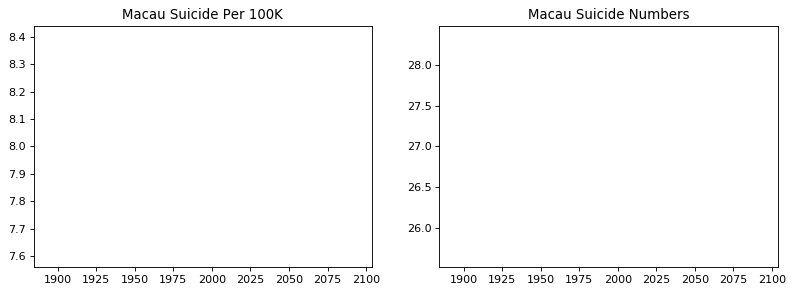

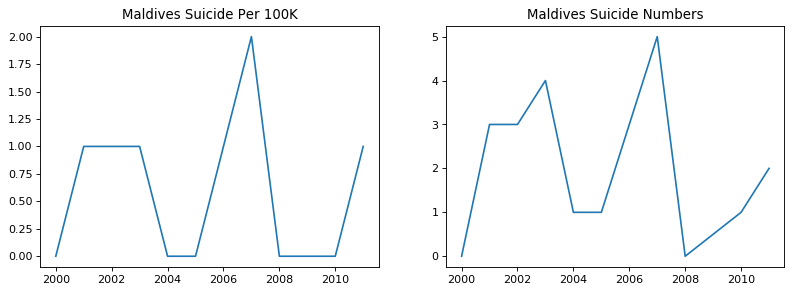

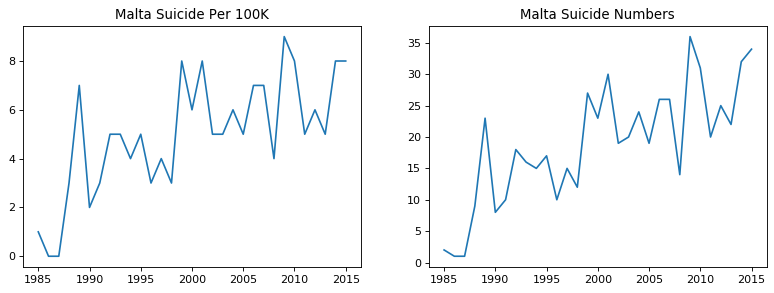

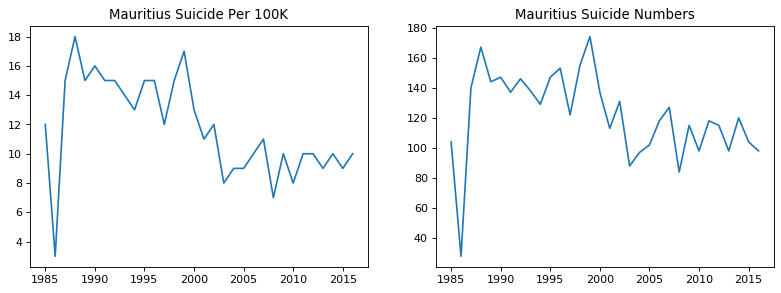

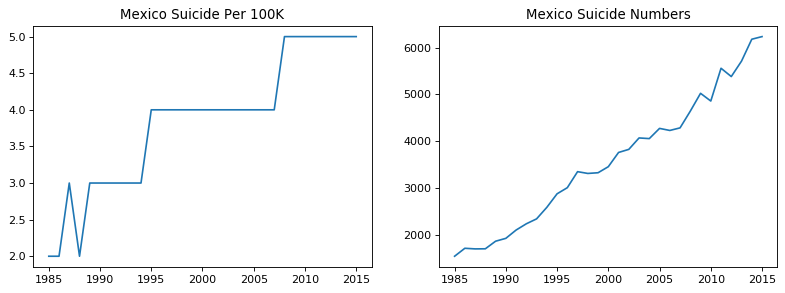

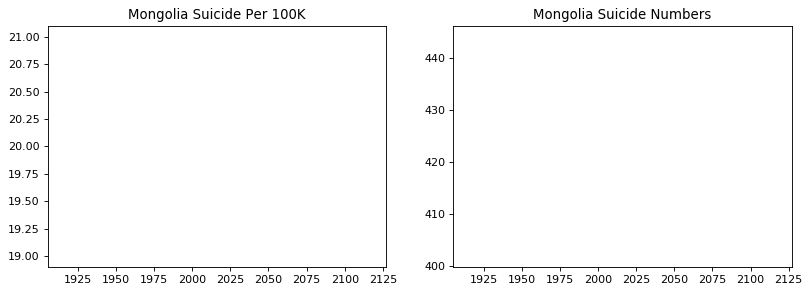

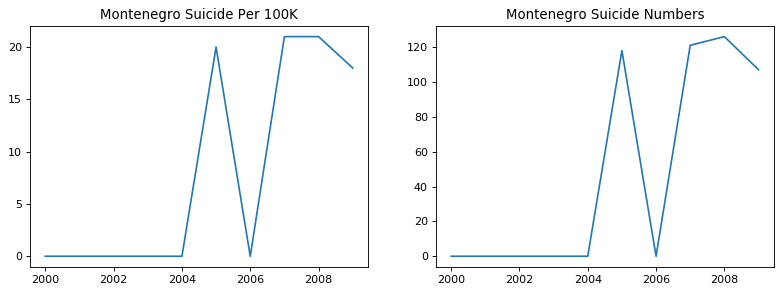

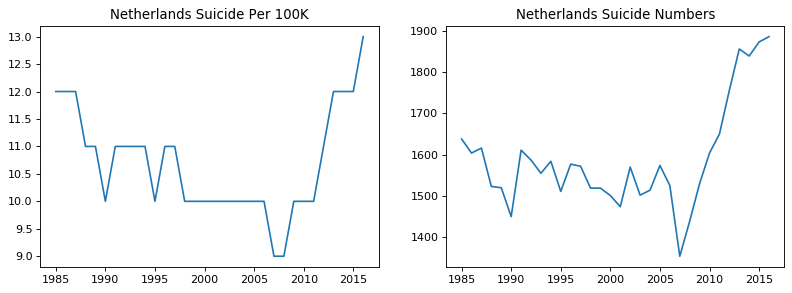

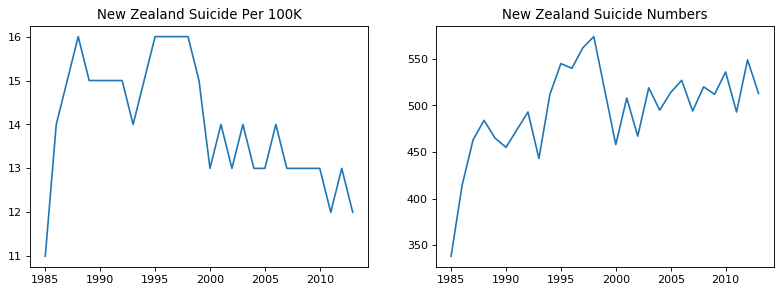

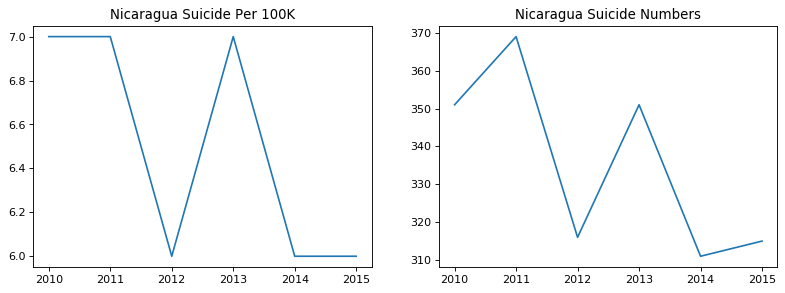

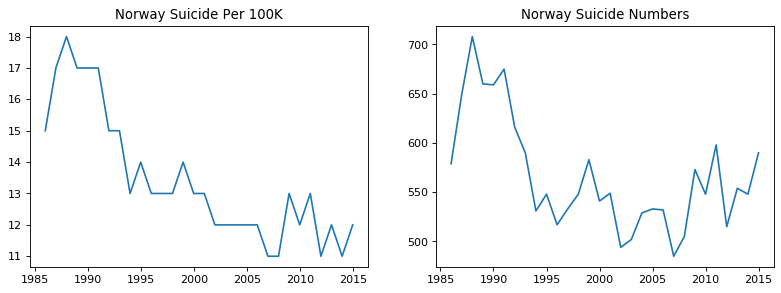

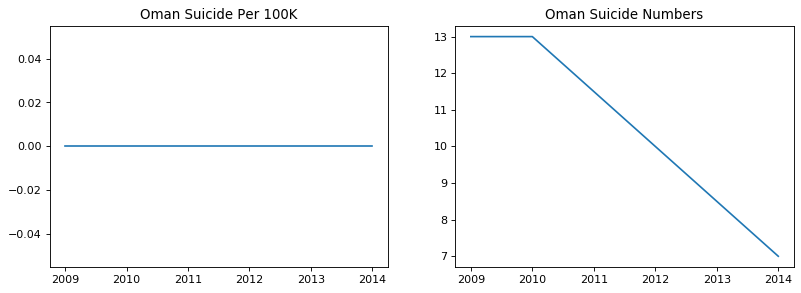

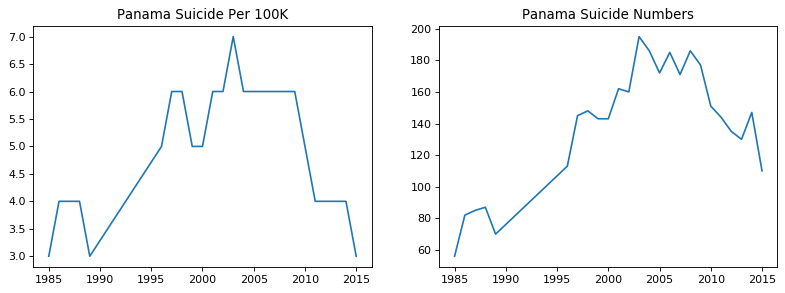

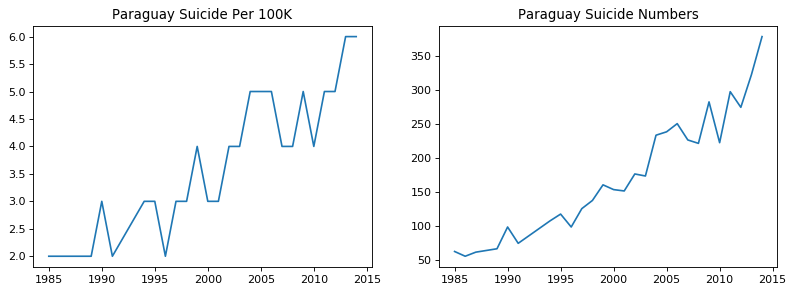

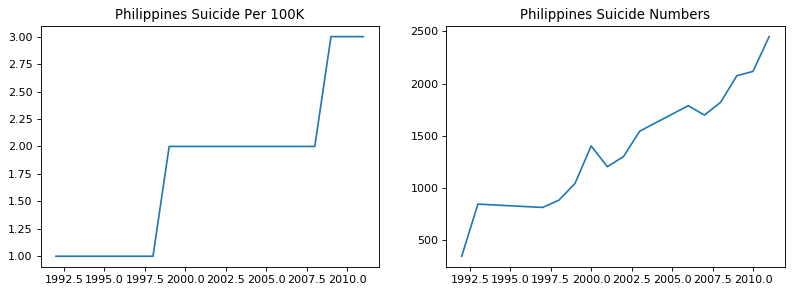

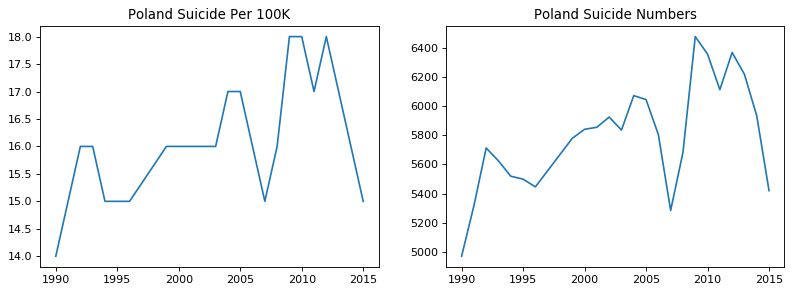

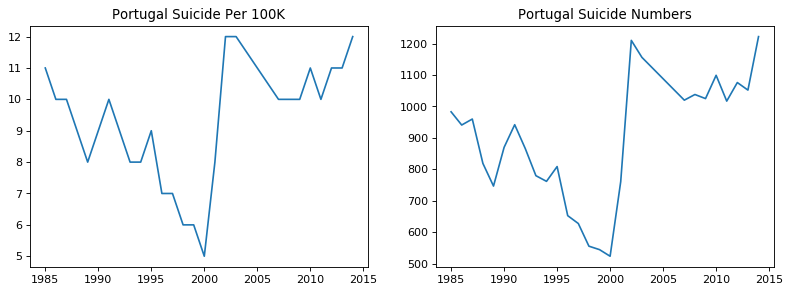

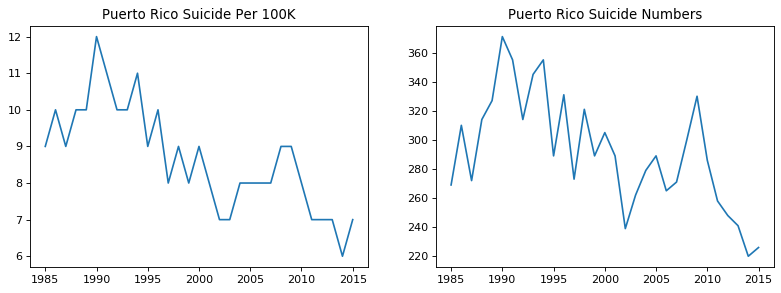

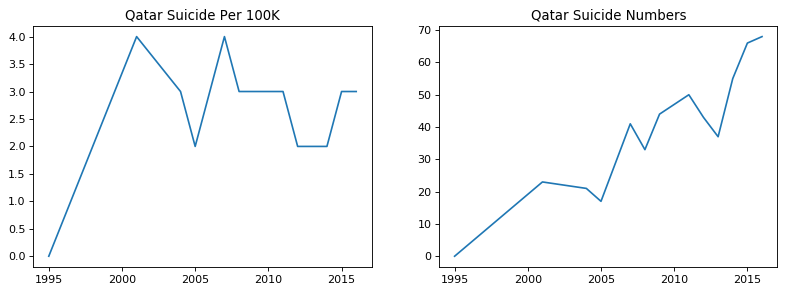

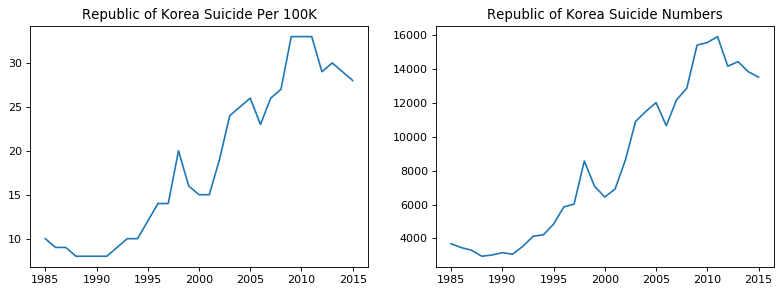

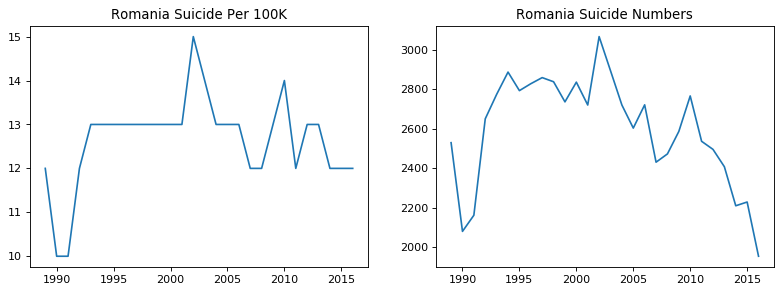

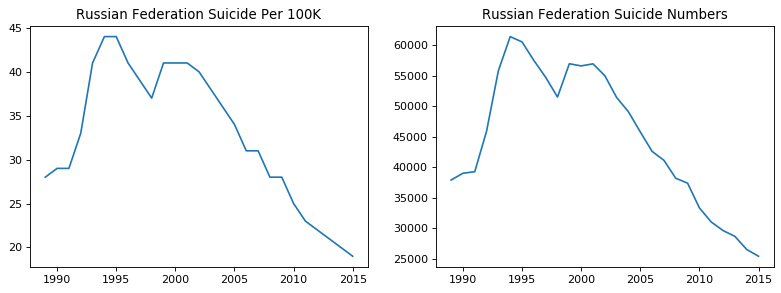

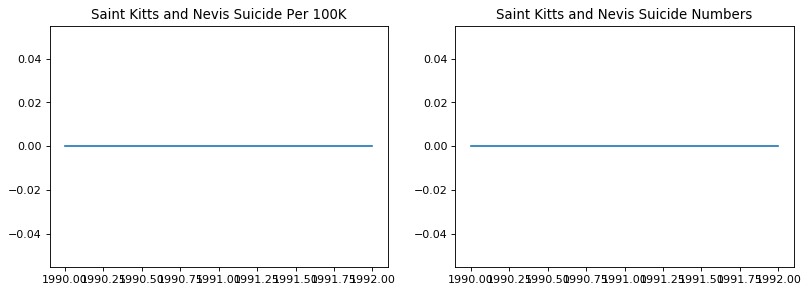

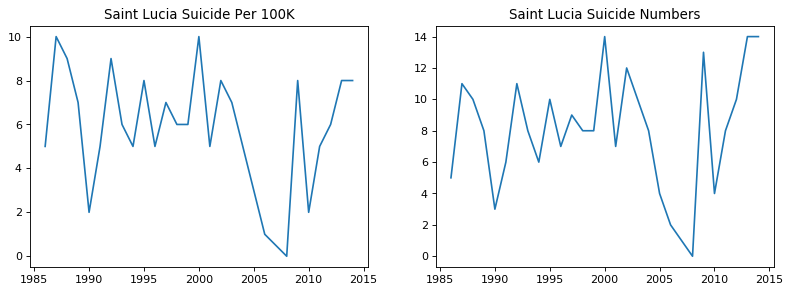

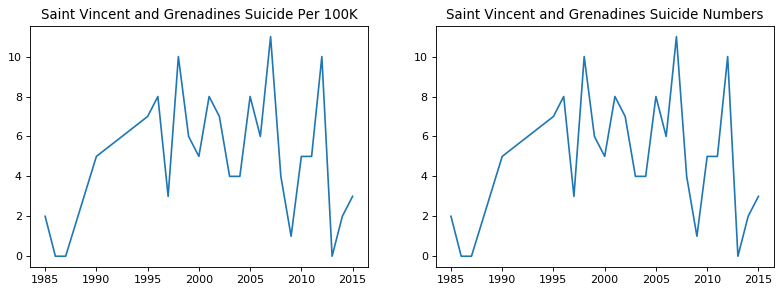

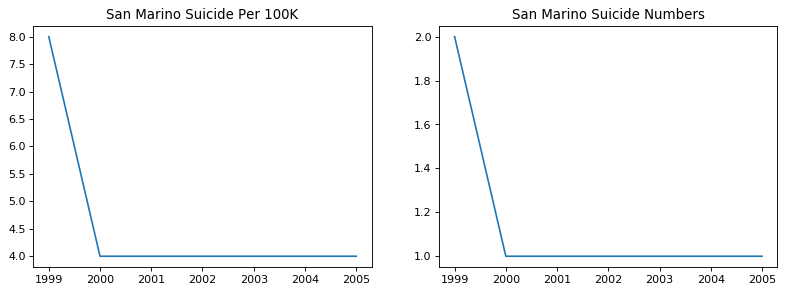

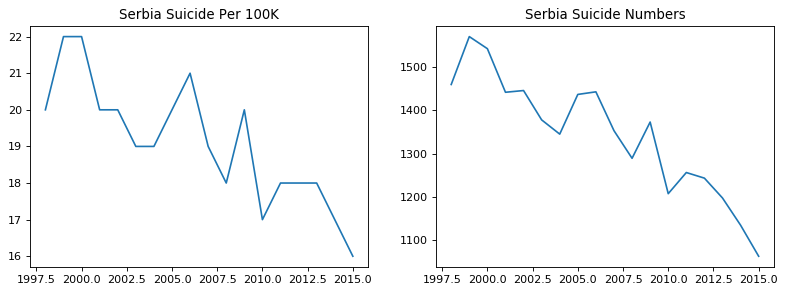

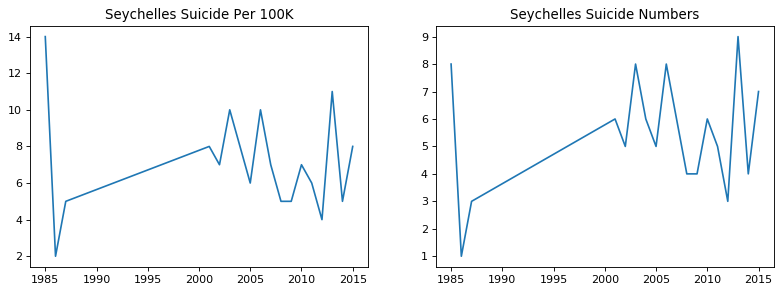

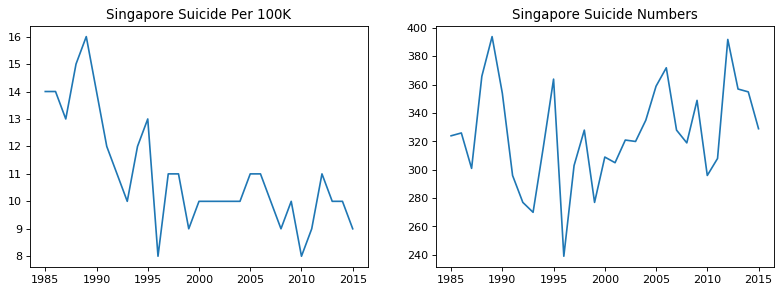

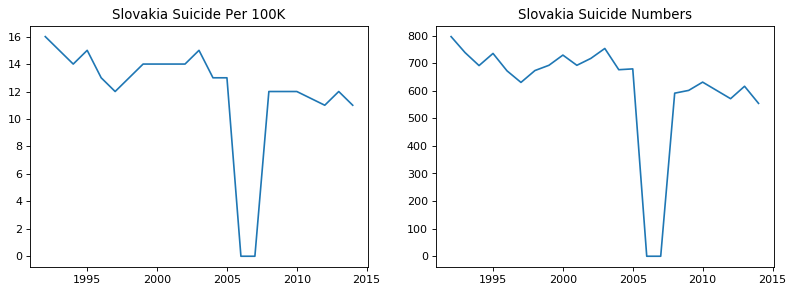

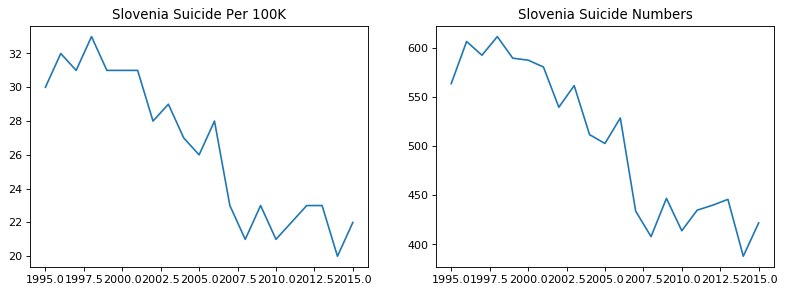

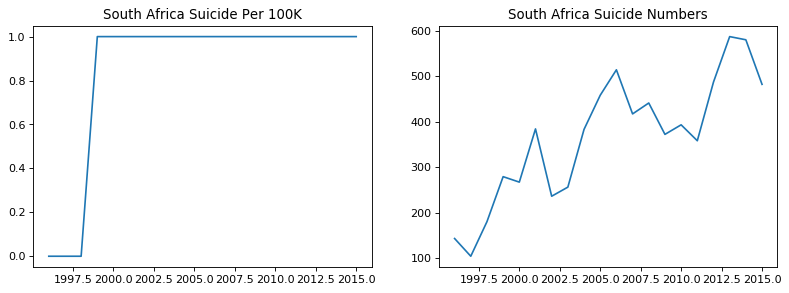

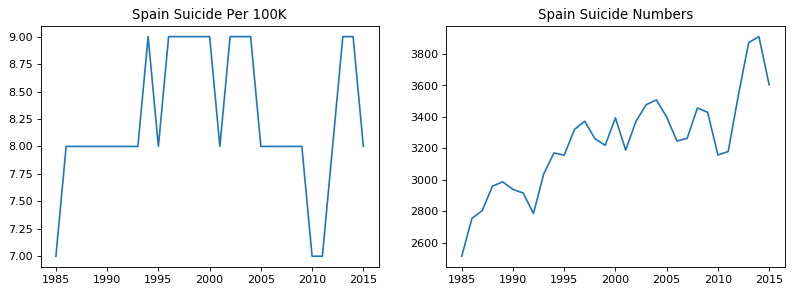

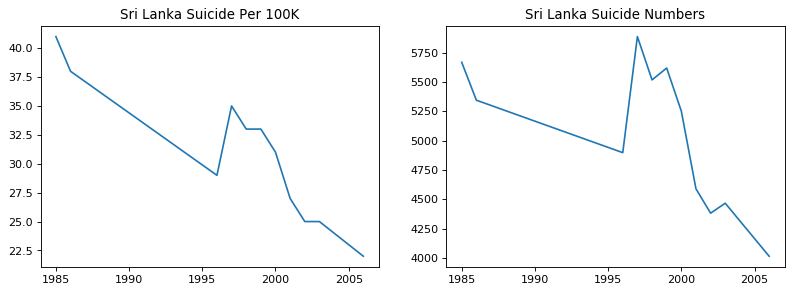

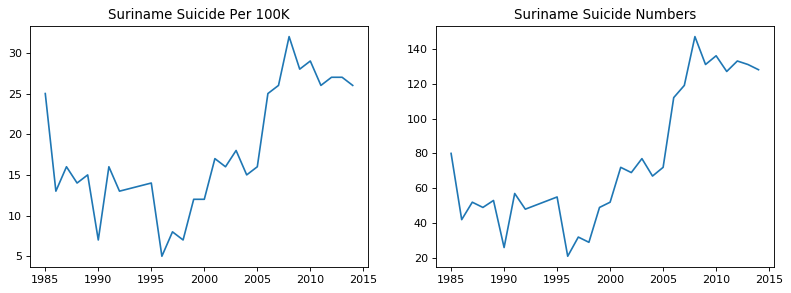

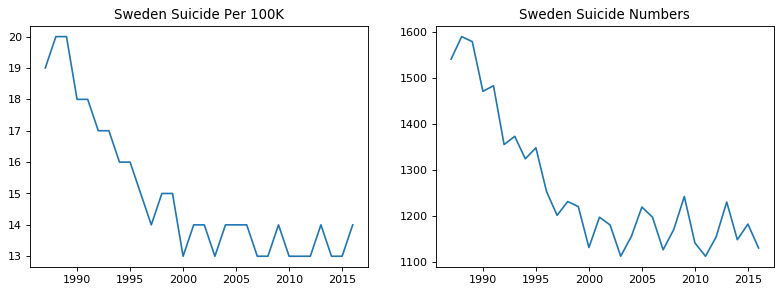

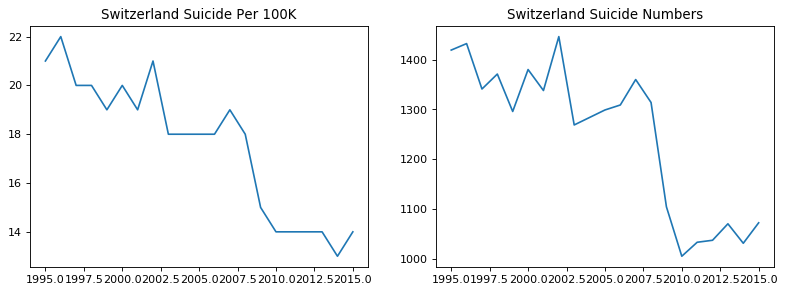

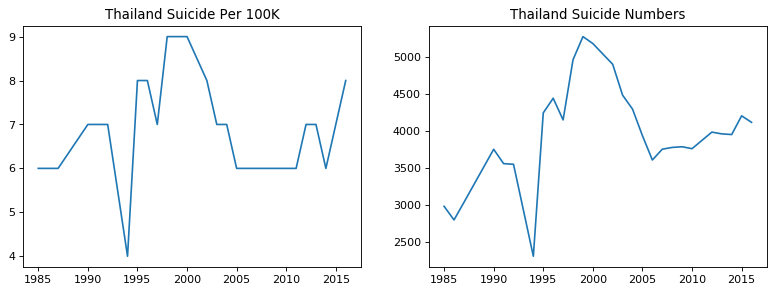

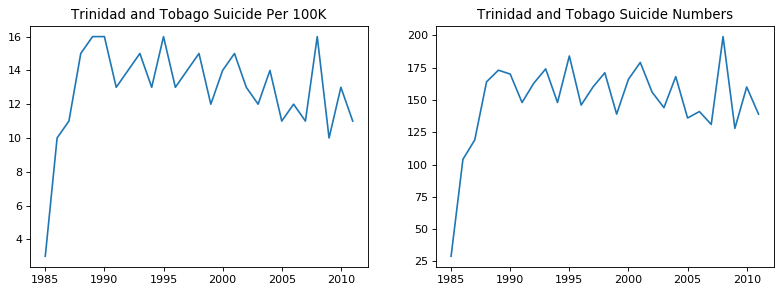

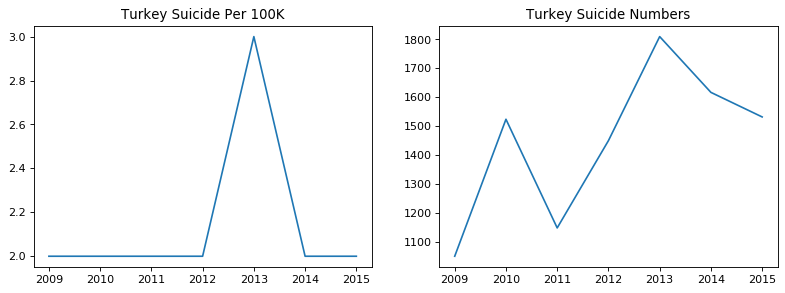

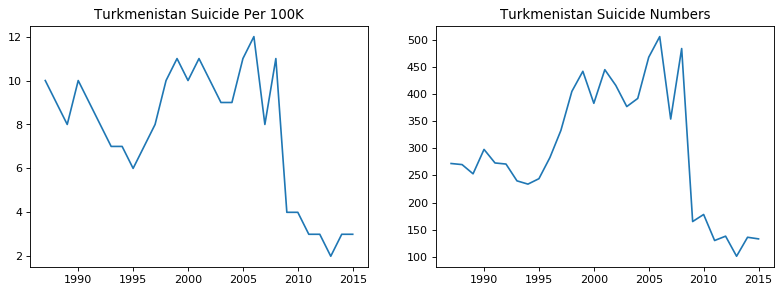

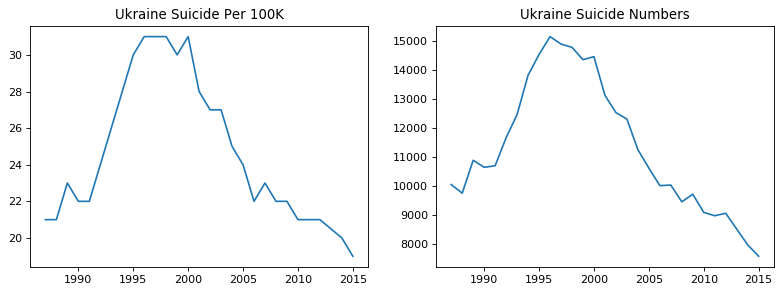

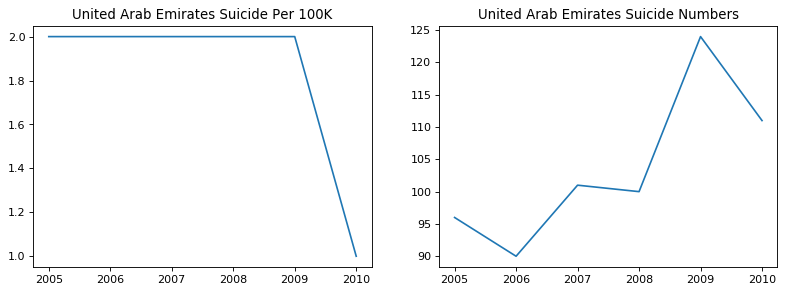

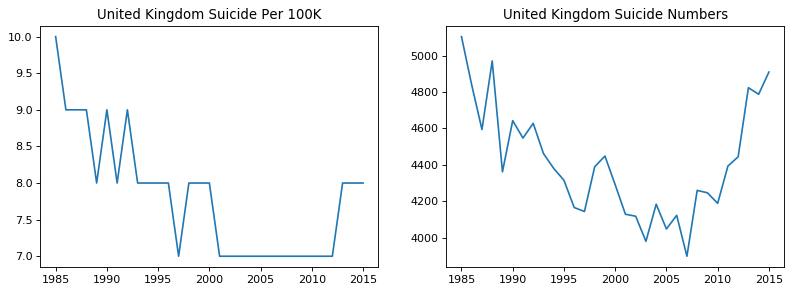

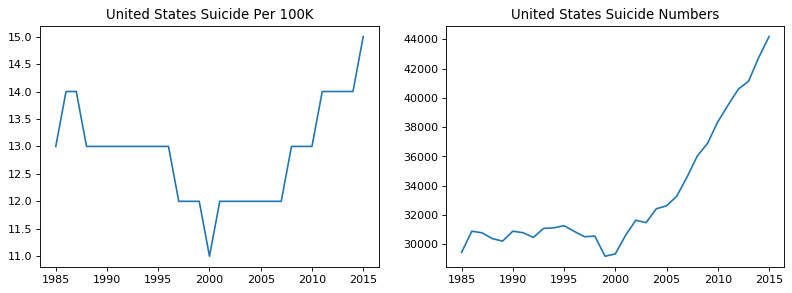

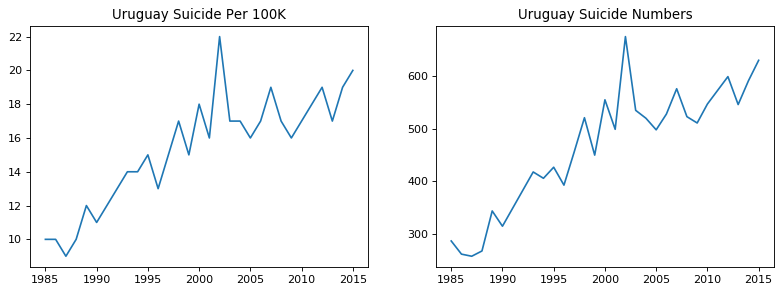

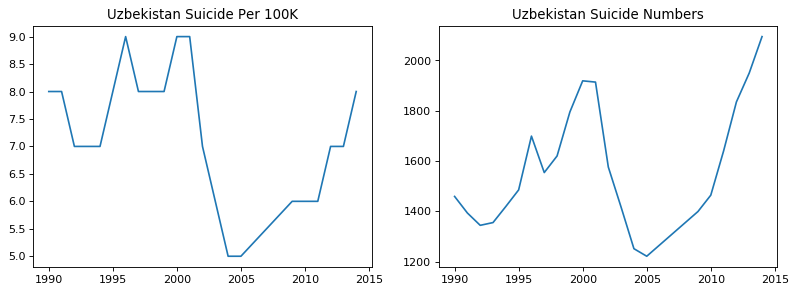

In [1]:
import numpy as np
import pandas as pd

from pandas import DataFrame

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import seaborn as sns

from pylab import *

%matplotlib inline

master = pd.read_csv('master.csv')
pivot_suicide=master.pivot_table(index=['country','year'],values=['suicides_no','population'], aggfunc={'suicides_no':sum,'population':sum})

countries=pivot_suicide.index.get_level_values(0).unique()
for country in countries:
    
    split=pivot_suicide.xs(country)
    split['suicide_rate']=((split.suicides_no/split.population)*100000).round()
    split['year']=split.index
    
    df1=DataFrame(split,columns=['suicide_rate'])
    df2=DataFrame(split,columns=['suicides_no'])
    df3=DataFrame(split,columns=['year'])
    df4=DataFrame(split,columns=['population'])

    figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    
    subplot(1,2,1)
    title(country+' Suicide Per 100K')
    plot(df3,df1)
    
    subplot(1,2,2)
    title(country+' Suicide Numbers')
    plot(df3,df2)
    
    show()

In [2]:
master.country.describe()

count           27820
unique            101
top       Netherlands
freq              382
Name: country, dtype: object

In [2]:
# Data was available for 101 countries in the original data source

# Removed 28 countries with unreliable/inconsistent/unsufficient data

bad_countries = ['Dominica','Grenada','Jamaica','Kiribati','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and Grenadines','San Marino',
'Seychelles','Albania','Antigua and Barbuda','Armenia','Aruba','Azerbaijan','Bahamas','Bahrain','Barbados','Belize','Bulgaria',
'Costa Rica','Cyprus','Macau','Maldives','Malta','Mongolia','Montenegro','Nicaragua','Oman']

master_good = master[~master['country'].isin(bad_countries)]

len(bad_countries)

28

In [3]:
master_good.country.describe()

# After removing those countries, data for 73 unique countries will be used for further analysis

count         22188
unique           73
top       Mauritius
freq            382
Name: country, dtype: object

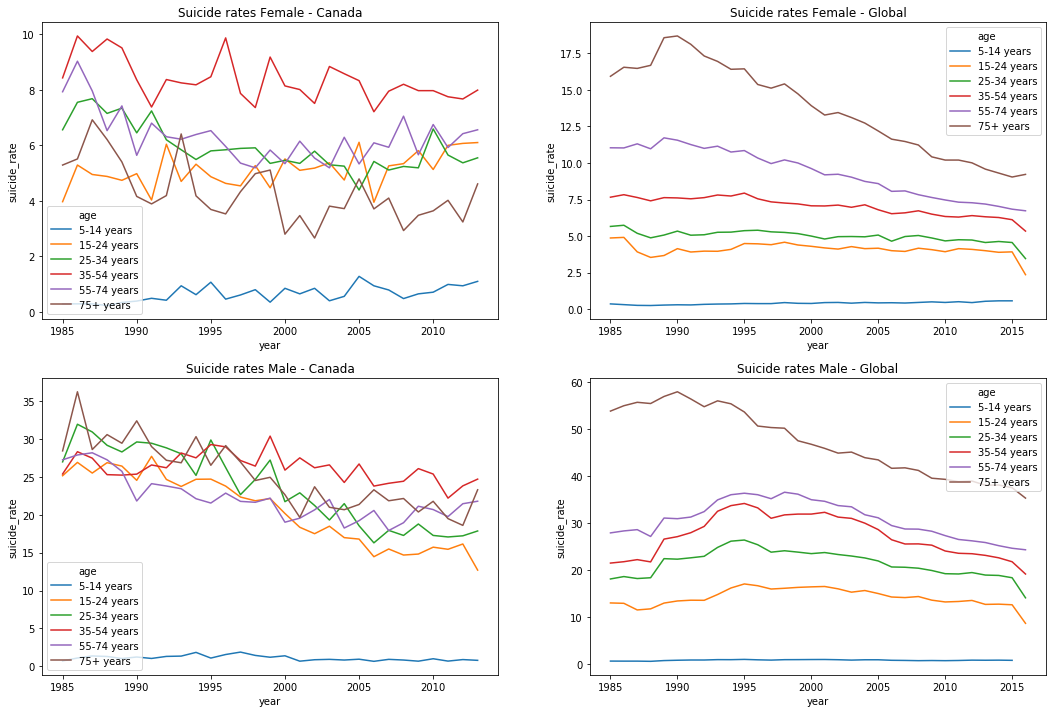

In [4]:
# Canada vs Global suicide rates comparison

# Task 1: Canada dataset 

data_Canada=master_good.loc[master_good['country']=='Canada']
grouped_Canada=data_Canada.groupby(['year','sex','age'])['suicides_no','population'].sum()
grouped_Canada['suicide_rate']=round((grouped_Canada.suicides_no/grouped_Canada.population)*100000,2);df_Canada=grouped_Canada.reset_index()

# Task 2: Global dataset - all 'good' countries excluding Canada

data_Global=master_good.loc[master_good['country']!='Canada'] 
grouped_Global=data_Global.groupby(['year','sex','age'])['suicides_no','population'].sum()
grouped_Global['suicide_rate']=round((grouped_Global.suicides_no/grouped_Global.population)*100000,2);df_Global=grouped_Global.reset_index()

# Task 3: Trend comparison for different age groups

age1='5-14 years';age2='15-24 years';age3='25-34 years';age4='35-54 years';age5='55-74 years';age6='75+ years'

fig,((a,b),(c,d))=plt.subplots(2,2,figsize=(18,12))

sns.lineplot(x='year',y='suicide_rate',hue='age',hue_order=[age1,age2,age3,age4,age5,age6],data=df_Canada.loc[df_Canada['sex']=='female'],ax=a);a.set_title('Suicide rates Female - Canada')
sns.lineplot(x='year',y='suicide_rate',hue='age',hue_order=[age1,age2,age3,age4,age5,age6],data=df_Canada.loc[df_Canada['sex']=='male'],ax=c);c.set_title('Suicide rates Male - Canada')
sns.lineplot(x='year',y='suicide_rate',hue='age',hue_order=[age1,age2,age3,age4,age5,age6],data=df_Global.loc[df_Global['sex']=='female'],ax=b);b.set_title('Suicide rates Female - Global')
sns.lineplot(x='year',y='suicide_rate',hue='age',hue_order=[age1,age2,age3,age4,age5,age6],data=df_Global.loc[df_Global['sex']=='male'],ax=d);d.set_title('Suicide rates Male - Global')

plt.show()


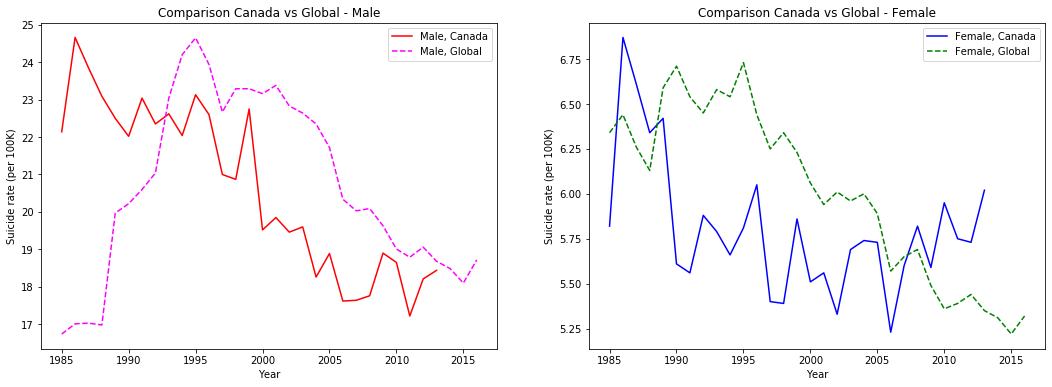

In [202]:
# Task 4: Annual trend comparison - Male & Female seperate 

C1=df_Canada.groupby(['year','sex'])['suicides_no','population'].sum()
C1['suicide_rate']=round((C1.suicides_no/C1.population)*100000,2);C2=C1.reset_index('sex')

G1=df_Global.groupby(['year','sex'])['suicides_no','population'].sum()
G1['suicide_rate']=round((G1.suicides_no/G1.population)*100000,2);G2=G1.reset_index('sex')


plt.figure(figsize=(18,6))

plt.subplot(1,2,1);ylabel('Suicide rate (per 100K)');xlabel('Year');title('Comparison Canada vs Global - Male')

plt.plot(C2.loc[C2['sex']=='male'].suicide_rate,'r',label='Male, Canada')
plt.plot(G2.loc[G2['sex']=='male'].suicide_rate,'Magenta',linestyle='--',label='Male, Global');legend(loc='upper right')

plt.subplot(1,2,2);ylabel('Suicide rate (per 100K)');xlabel('Year');title('Comparison Canada vs Global - Female')

plt.plot(C2.loc[C2['sex']=='female'].suicide_rate,'b',label='Female, Canada')
plt.plot(G2.loc[G2['sex']=='female'].suicide_rate,'g',linestyle='--',label='Female, Global');legend(loc='upper right')

plt.show()


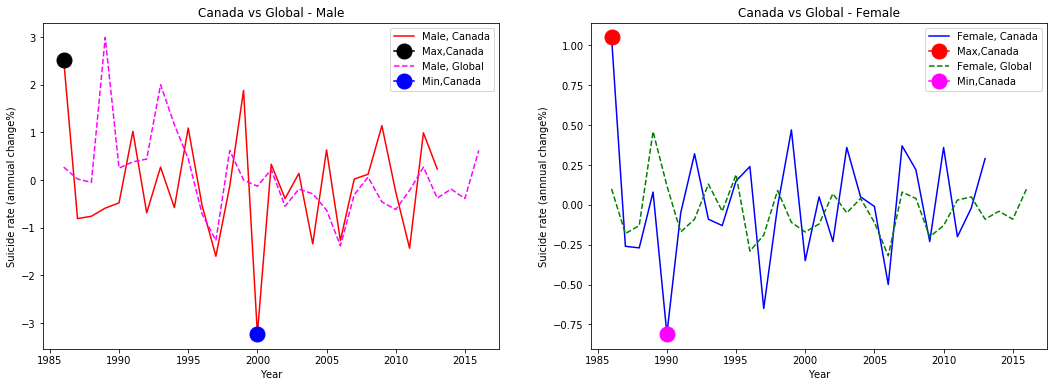

In [203]:
# Task 5: Year-over-year suicide rate change analysis - Canada vs Global

C3=C1.assign(annual_change=C1.groupby('sex')['suicide_rate'].apply(lambda x:x.diff().fillna(x)));C4=C3.reset_index('sex').drop(['1985'])
G3=G1.assign(annual_change=G1.groupby('sex')['suicide_rate'].apply(lambda x:x.diff().fillna(x)));G4=G3.reset_index('sex').drop(['1985'])

plt.figure(figsize=(18,6))

plt.subplot(1,2,1);ylabel('Suicide rate (annnual change%)');xlabel('Year');title('Canada vs Global - Male')

plt.plot(C4.loc[C4['sex']=='male'].annual_change,'r',label='Male, Canada')
C5=C4.loc[C4['annual_change']==C4.loc[C4['sex']=='male'].annual_change.max()];C6=C5.reset_index()
plt.plot('year','annual_change',data=C6,marker='o',markersize=15,color='black',label='Max,Canada')

plt.plot(G4.loc[G4['sex']=='male'].annual_change,'Magenta',linestyle='--',label='Male, Global');legend(loc='upper right')
C7=C4.loc[C4['annual_change']==C4.loc[C4['sex']=='male'].annual_change.min()];C8=C7.reset_index()
plt.plot('year','annual_change',data=C8,marker='o',color='blue',markersize=15,label='Min,Canada')

plt.legend()

plt.subplot(1,2,2);ylabel('Suicide rate (annnual change%)');xlabel('Year');title('Canada vs Global - Female')

plt.plot(C4.loc[C4['sex']=='female'].annual_change,'b',label='Female, Canada')
C9=C4.loc[C4['annual_change']==C4.loc[C4['sex']=='female'].annual_change.max()];C10=C9.reset_index()
plt.plot('year','annual_change',data=C10,marker='o',markersize=15,color='r',label='Max,Canada')

plt.plot(G4.loc[G4['sex']=='female'].annual_change,'g',linestyle='--',label='Female, Global');legend(loc='upper right')
C11=C4.loc[C4['annual_change']==C4.loc[C4['sex']=='female'].annual_change.min()];C12=C11.reset_index()
plt.plot('year','annual_change',data=C12,marker='o',color='Magenta',markersize=15,label='Min,Canada')

plt.legend();plt.show()


In [219]:
# Task 6: Year-over-year suicide rate change analysis btw 2007-2016 (10 years)

Overall=master_good.groupby(['year','country','sex'])['suicides_no','population'].sum()
Overall['suicide_rate']=round((Overall.suicides_no/Overall.population)*100000,2);O1=Overall.reset_index()

O2=O1.assign(annual_change=O1.groupby(['country','sex'])['suicide_rate'].apply(lambda x:x.diff().fillna(x)));O3=O2.loc[O2['year']>=2007]

Overall_f=O3.loc[O3['sex']=='female'];Overall_f.sort_values('annual_change')

# TOP 5 highest increase/decrease (female)

year                 country     sex  suicides_no  population  \
2700  2008              Luxembourg  female            8      232706   
2884  2009             Switzerland  female          278     3751080   
3160  2011                Suriname  female           32      240208   
3686  2016                 Iceland  female            4      133651   
3098  2011                 Iceland  female            5      147390   
...    ...                     ...     ...          ...         ...   
2862  2009       Republic of Korea  female         5475    23679050   
3454  2014  Bosnia and Herzegovina  female           70     1867562   
3230  2012                 Iceland  female           11      148401   
3018  2010                Suriname  female           42      237400   
2592  2007       Republic of Korea  female         4427    23391286   

      suicide_rate  annual_change  
2700          3.44          -7.49  
2884          7.41          -4.80  
3160         13.32          -4.37  
3686          2.99          -4.17  
3098          3.39          -3.43  
...            ...            ...  
2862         23.12           3.58  
3454          3.75           3.75  
3230          7.41           4.02  
3018         17.69           4.05  
2592         18.93           4.19  

[603 rows x 7 columns]

In [250]:
# TOP 5 highest increase/decrease (male)

Overall_m=O3.loc[O3['sex']=='male'];Overall_m.sort_values('annual_change')

year                 country   sex  suicides_no  population  \
2503  2007                 Belarus  male         2203     4293071   
2893  2009            Turkmenistan  male          125     2197988   
3099  2011                 Iceland  male           22      148085   
2889  2009     Trinidad and Tobago  male          107      605341   
2605  2007                Slovenia  male          335      947874   
...    ...                     ...   ...          ...         ...   
3381  2013               Lithuania  male          887     1284993   
3455  2014  Bosnia and Herzegovina  male          243     1786607   
2951  2010                  Guyana  male          156      335208   
3059  2011              Cabo Verde  male           37      224507   
2737  2008                Slovakia  male          508     2488426   

      suicide_rate  annual_change  
2503         51.32         -15.09  
2893          5.69         -11.42  
3099         14.86          -9.47  
2889         17.68          -9.37  
2605         35.34          -8.83  
...            ...            ...  
3381         69.03          11.07  
3455         13.60          13.32  
2951         46.54          13.94  
3059         16.48          16.48  
2737         20.41          20.41  

[603 rows x 7 columns]

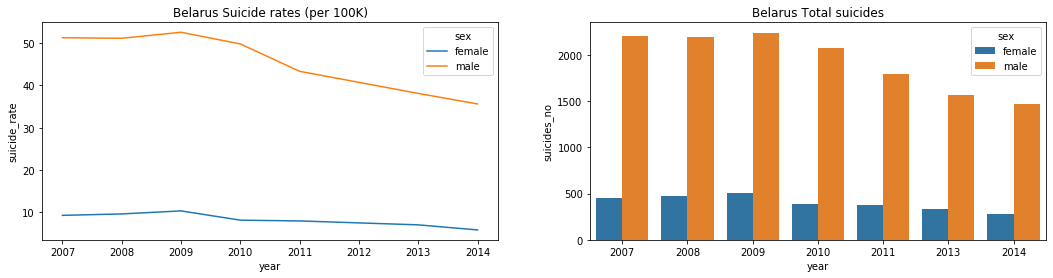

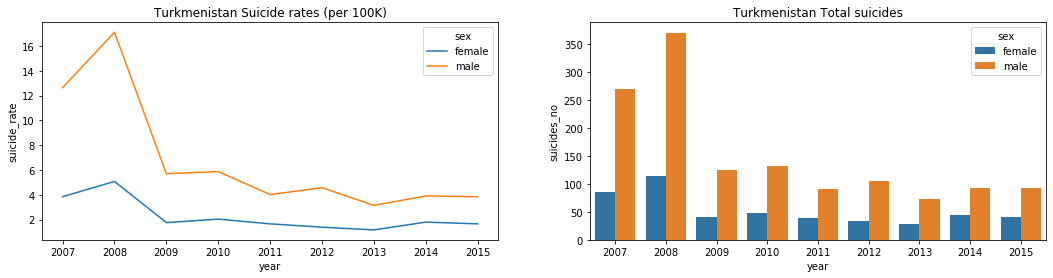

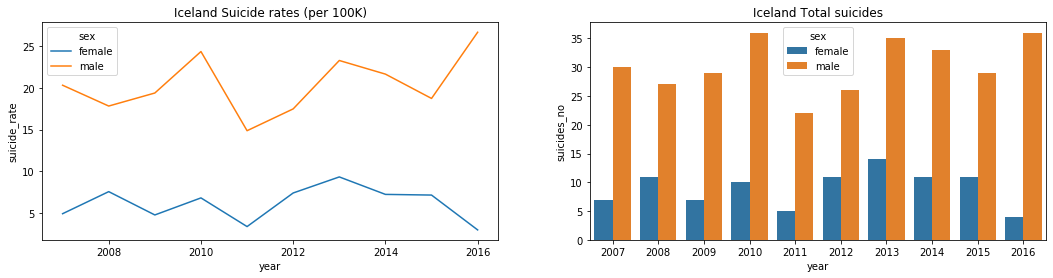

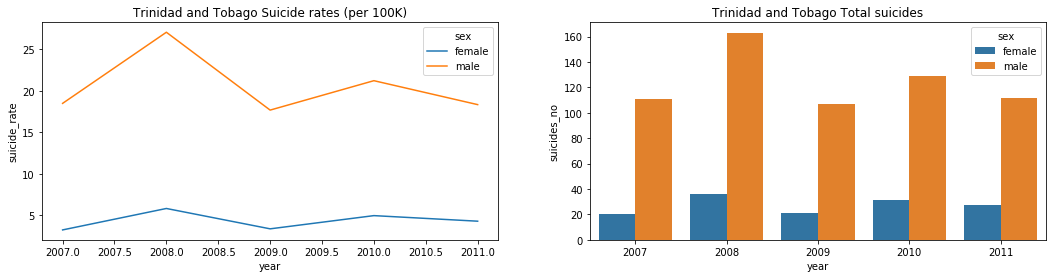

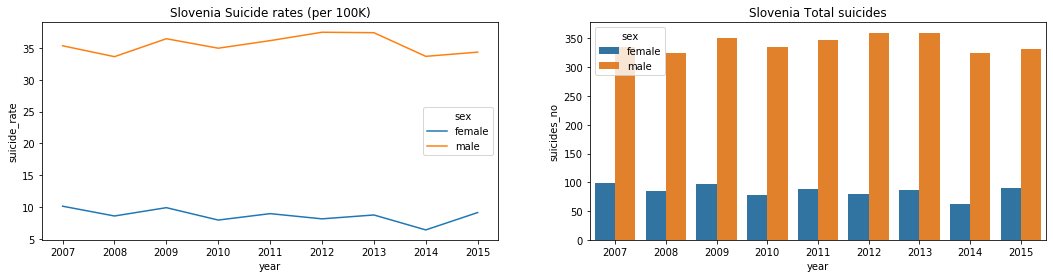

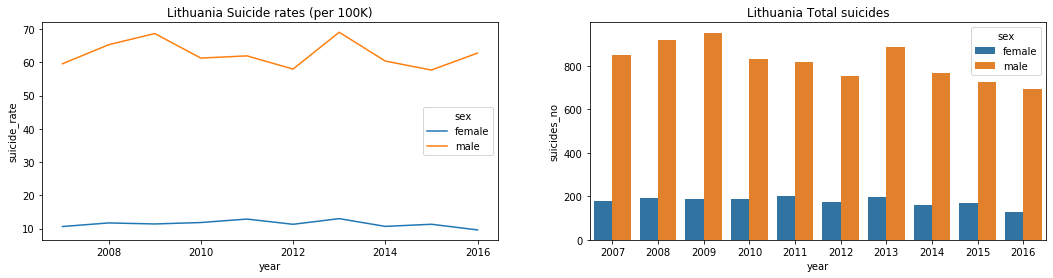

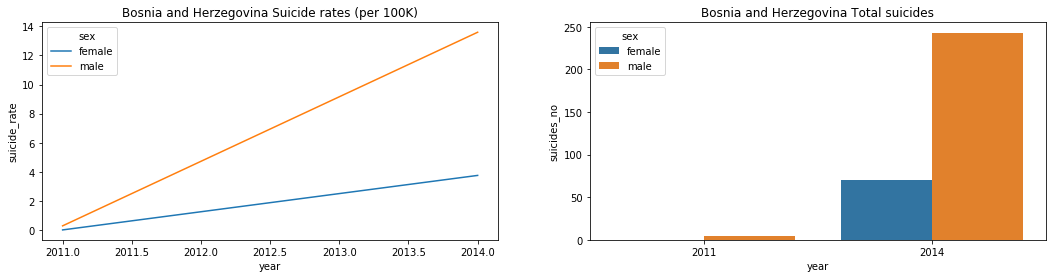

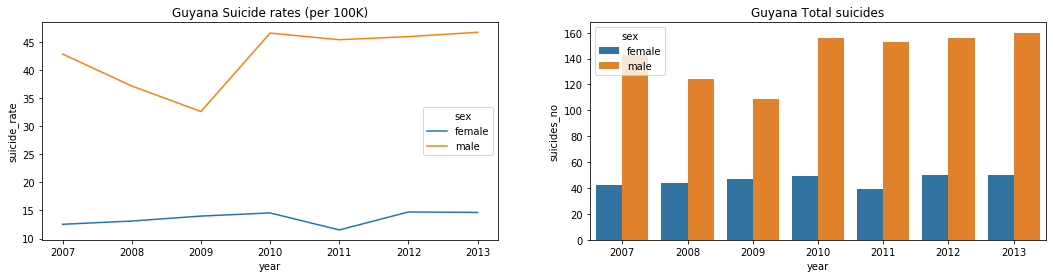

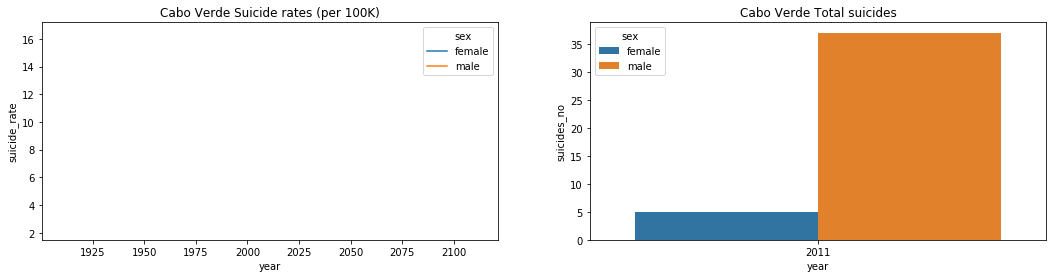

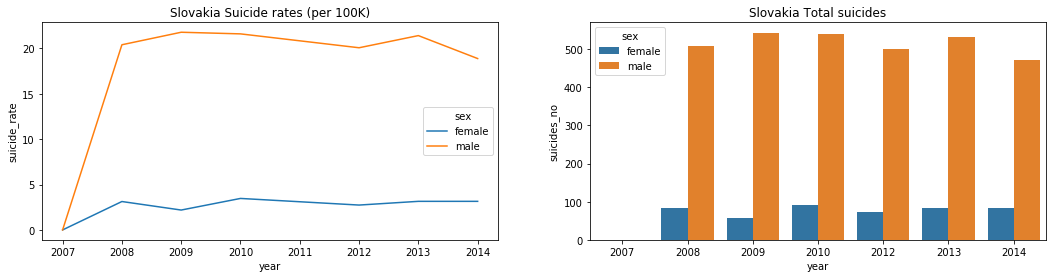

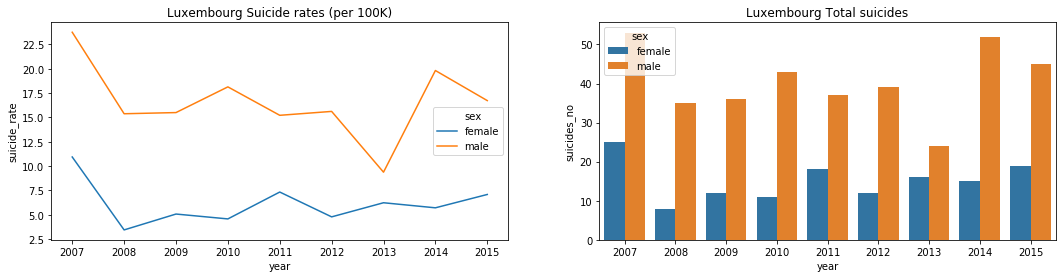

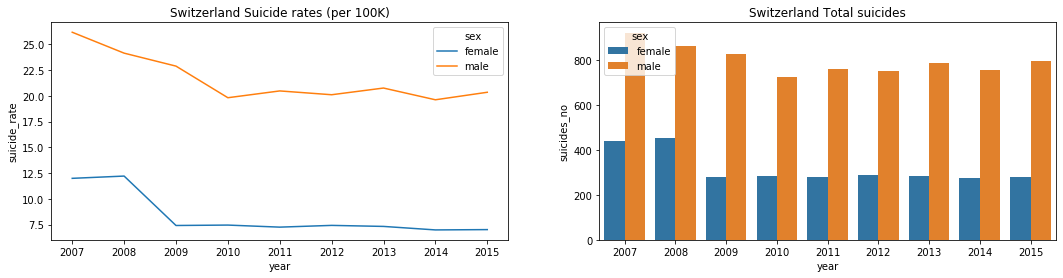

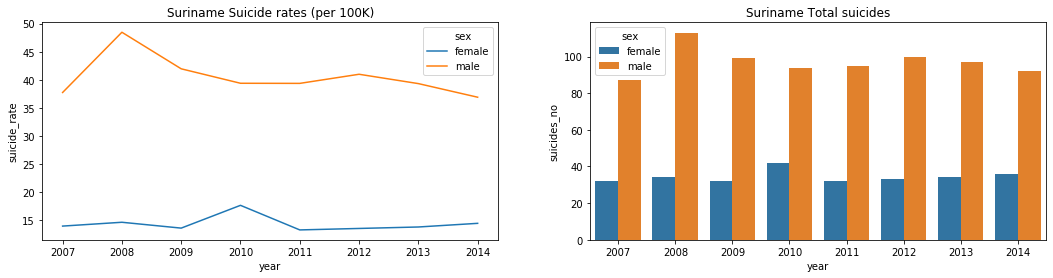

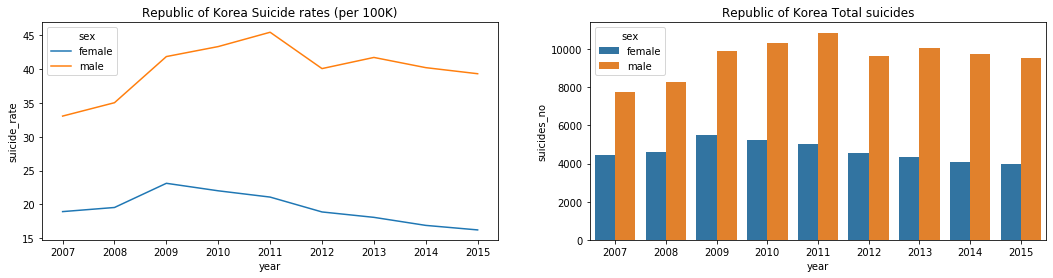

In [252]:
# Tasks 7 : Detailed review for countries with highest-increase/decrease in suicide rates

countries_highest=['Belarus','Turkmenistan','Iceland','Trinidad and Tobago','Slovenia','Lithuania','Bosnia and Herzegovina','Guyana','Cabo Verde','Slovakia','Luxembourg','Switzerland','Suriname','Republic of Korea']

for country in countries_highest:
    
    O4=O3.loc[O3['country']==country]
    
    fig,(a,b)=plt.subplots(1,2,figsize=(18,4))
    sns.lineplot(x='year',y='suicide_rate',hue='sex',data=O4,ax=a);a.set_title(country + ' Suicide rates (per 100K)')
    sns.barplot(x='year',y='suicides_no',hue='sex',data=O4,ax=b);b.set_title(country + ' Total suicides')
    
    plt.show()
